In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

PATH = "/home/andre/Documents/Git/VISAO_ROBOTICA_EGM0008/02_FORMACAO_DE_IMAGENS/"
PATH_IMG = "/home/andre/Documents/Git/VISAO_ROBOTICA_EGM0008/IMAGENS/"

os.chdir(PATH)
os.listdir()

['Formacao_de_imagens.ipynb']

In [2]:
def deg_to_rad(deg):
  return deg * np.pi / 180.
# ================================================
def rad_to_deg(rad):
  return rad * 180. / np.pi
# ================================================
def rotacao_2D(angulo):
    return np.array([[np.cos(angulo), -np.sin(angulo)], [np.sin(angulo), np.cos(angulo)]])
# ================================================
def MatrixTransformacao(ponto, S, angulo, t):
    return np.array([[S[0]*np.cos(angulo), -np.sin(angulo), t[0]], [np.sin(angulo), S[1]*np.cos(angulo), t[1]], [0, 0, 1]]) @ ponto
# ================================================
def MatrixTransformacaoInversa(ponto, S, angulo, t):
    return np.linalg.inv(np.array([[S[0]*np.cos(angulo), -np.sin(angulo), t[0]], [np.sin(angulo), S[1]*np.cos(angulo), t[1]], [0, 0, 1]])) @ ponto
# ================================================
def MatrixProjecao(Xw, resolucao, f, dimensions, s):
    fx = f * resolucao[0] / dimensions[0]
    fy = f * resolucao[1] / dimensions[1]

    cx = resolucao[0] / 2
    cy = resolucao[1] / 2

    return np.array([[fx, s, cx], [0, fy, cy], [0, 0, 1]])

# **Translação**

![translacao.jpg](../imgs_markdown/translacao.jpg)

* $X$: Vetor Coluna do Ponto Original;
* $t$: Vetor coluna do deslocamento.

[[3]
 [4]]


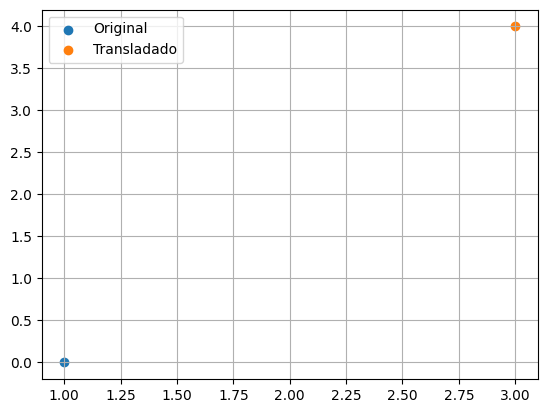

In [3]:
X = np.array([[1],[0]])
t = np.array([[2],[4]])

Xnew = X + t

print(Xnew)

plt.scatter(X[0],X[1], label="Original")
plt.scatter(Xnew[0],Xnew[1], label="Transladado")
plt.grid()
plt.legend()

plt.show()

del X, t, Xnew

# **Escala**

![escala.png](../imgs_markdown/escala.jpg)

* $S$: Matriz Escala

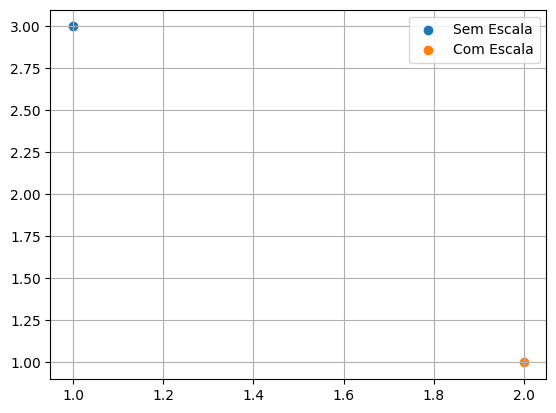

In [4]:
sx = 2
sy = 1

S = np.array([[sx, 0],[sy, 0]])
X = np.array([[1],[3]])

Xnew = S @ X

plt.scatter(X[0], X[1], label="Sem Escala")
plt.scatter(Xnew[0], Xnew[1], label="Com Escala")
plt.grid()
plt.legend()

plt.show()

del sx, sy, S, X, Xnew

# **Rotação**

![rotacao.jpg](../imgs_markdown/rotacao.jpg)

$X' = R_{x|y|z} \cdot X$

* $R_{x|y|z}$: Matriz Rotação de algum dos eixos;
* $X$: Vetor Coluna do ponto.

p1 = [[2], [4]]
p1 = [[-4.], [2.]]


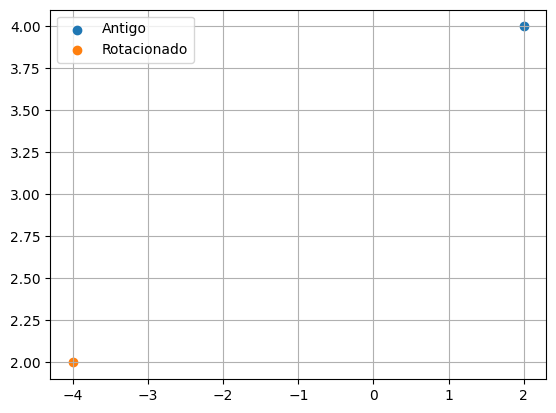

In [5]:
p1 = [[2],[4]]
p2 = rotacao_2D(deg_to_rad(90)) @ p1

print(f'p1 = [{p1[0]}, {p1[1]}]')
print(f'p1 = [{p2[0]}, {p2[1]}]')

plt.scatter(p1[0], p1[1], label='Antigo')
plt.scatter(p2[0], p2[1], label='Rotacionado')
plt.grid()
plt.legend()

plt.show()

del p1, p2

# **Representação Homogênea**

Seria conveniente poder representar todas as transformações
apresentadas em forma multiplicação matricial
e inclusive combinar as transformações de forma que uma única matriz
pudesse realizar transformações diferentes

Para isto utilizamos a representação em coordenadas homogêneas.

(PROF. MARCELO NOGUEIRA; PROF. BRUNO SILVA)

## Representação Homogênea de um ponto

![homogenea_ponto.jpg](../imgs_markdown/homogenea_ponto.jpg)

* $x$ : Vetor Aumentado
* $k$: Uma constante (geralmente $k=1$)

O $k$ pode ter quaquer valor, porém ao realizar as operações matriciais, a matriz resultante das operações deve ter
seus valores dividio por $k$ para ter seu valor representado nas coordenadas cartesianas novamente.

## Representação Homogênea de uma translação

![homogenea_translacao.jpg](../imgs_markdown/homogenea_translacao.jpg)

## Representação Homogênea de uma Rotação (em Z)

![homogenea_rotacao.jpg](../imgs_markdown/homogenea_rotacao.jpg)

## Representação Homogênea de uma Escala, Rotação (em Z) e Translação em 2D

Para representar as três operações (consecutivas) de Escala, Rotação e Translação, há uma única matriz que
realiza essa operação:

![Matriz Transformaca](../imgs_markdown/matriz_transformacao.jpg)

<br>

![Matriz Transformacao completa](../imgs_markdown/matriz_transformacao_completa.jpg)

[-2.5  4.3  1. ]
[2. 4. 1.]


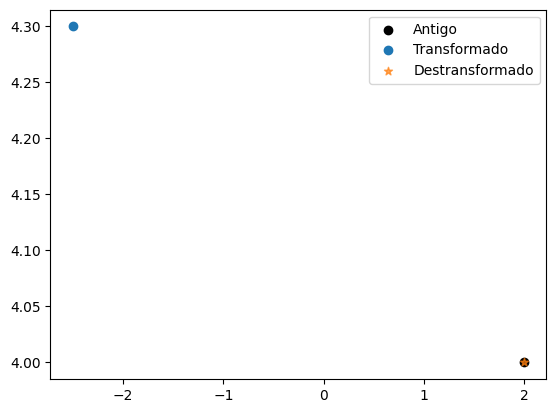

In [6]:
k = 1
ponto = np.array([2/k, 4/k, k])

x = MatrixTransformacao(ponto=ponto.transpose(), S=[1,1], angulo=np.pi/2, t=[1.5, 2.3])
print(x)

x_destransformado = MatrixTransformacaoInversa(ponto=x, S=[1,1], angulo=np.pi/2, t=[1.5, 2.3])
print(x_destransformado)

plt.scatter((ponto[0]), ponto[1], label="Antigo", color='black')
plt.scatter((x[0]), x[1], label="Transformado")
plt.scatter((x_destransformado[0]), x_destransformado[1], label="Destransformado", marker='*', alpha=0.7)
# plt.grid()
plt.legend()
# plt.xlim([-2, 2])
# plt.ylim([-2, 2])

plt.show()

del k, x, x_destransformado

## Representação Homogênea de uma Escala, Rotação (em Z) e Translação em 3D

A matriz de transformação pode ser expandido para o 3D:

![Ponto 3D em coordenadas homogênea](../imgs_markdown/homogenea_ponto_3d.jpg)

<br>

As rotações irão agir nos 3 eixos, basta usar as matrizes de rotação de cada eixo. Vale lembrar
que multiplicação de matriz não é comutativa, ou seja, as multiplicações das matrizes de rotação
seguiram uma sequência (a depender do programador).

![Matrizes de Rotação](../imgs_markdown/rotacao.jpg)

<br>

Portanto a matriz de Transformação será uma matriz 4x4:

![Matriz Transformaca](../imgs_markdown/matriz_transformacao.jpg)

<br>

![Matriz Rotacao 3D](../imgs_markdown/Rotacao_3D.jpg)

# **Projeção**

Projeção é diminuir a representatividade do objeto de uma dimensão de $n$
para $n - 1$. Como tirar a foto com uma câmera: Vemos um objeto em 3D e ao tirar
a foto, esse objeto é representado numa foto em 2D.
<br>
Há dois tipos de Projeção:

* Ortográfica, ou paralela
* Perspectiva, ou homográfica

## Ortográfica (Paralela)

![[Projeção Ortografica](https://adenilsongiovanini.com.br/blog/projecao-cilindrica/projecao-ortografica/)](../imgs_markdown/projecao_ortografica.jpg)

## Perspectiva (Homográfica)

Projeta radialmente cada ponto na imagem, a imagem é invertida no plano de projeção,
como ocorre com o modelo *pin hole* ou o olho humano.

![Projecao Homografica](../imgs_markdown/projecao_homografica.jpg)

# **Transformação de Perspectiva**

Aproximam como as imagens são aproximadas (modelo da câmera), porém há
uma perda de informação, pois está redimensionando um objeto de uma dimensão 3D
para o 2D. Além disso, são trnasformações não lineares.
<br>

* Mundo ($W$)
* Câmera ($C$)
* Imagem ($I$)

![Pontos](../imgs_markdown/transformacao_perspectiva.jpg)

![Eixos](../imgs_markdown/transformacao_perspectiva_coordenadas.jpg)

## Parâmetros Intrísecos

![Parâmetros Intrísecos](../imgs_markdown/matriz_parametros_intrisecos.jpg)

<br>

* $f$: Distância Focal
* $(c_x, c_y)$: Centro da Imagem (geralmente é metade da resolução)
* $s$: eixo do sensor não perpendicular ao eixo óptico (geralmente nulo)
* $a$: *aspect ratio* - pixels não quadrados (geralmente 1)

<br>

![Parâmetros Intrísecos 02](../imgs_markdown/matriz_parametros_intrisecos_02.jpg)

<br>

![Parâmetros Intrísecos 03](../imgs_markdown/matriz_parametros_intrisecos_03.jpg)

<br>

Lembrando que ao realizar a transformação, deve-se realizar a divião do novo ponto
pela constante $k$, e considerar os valores de $x$ e $y$, já que estamos indo do 3D
para o 2D.

In [15]:
resolucao = [640, 480]
f = 0.005
s = 0
dimensoes = [0.01333, 0.01]

fx = f * resolucao[0] / dimensoes[0]
fy = f * resolucao[1] / dimensoes[1]

cx = resolucao[0] / 2
cy = resolucao[1] / 2

K = np.array([[fx, s, cx], [0, fy, cy], [0,0,1]])
print(K)

X1 = np.array([0,0,2])
X1new = K @ X1.transpose()
X1new = X1new / X1new[2]
print(X1new)

del resolucao, f, s, dimensoes
del fx, fy, cx, cy
del K
del X1, X1new

[[240.060015   0.       320.      ]
 [  0.       240.       240.      ]
 [  0.         0.         1.      ]]
[320. 240.   1.]
